<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

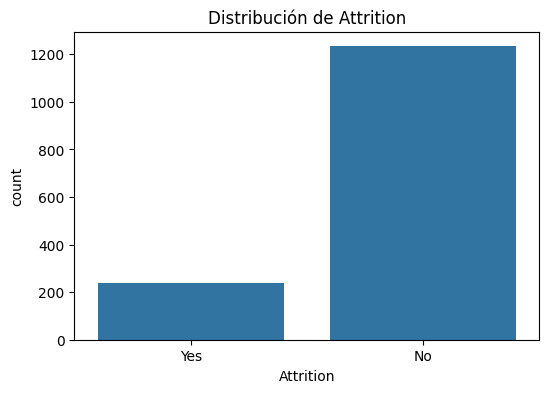

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Ver estructura
print(df.info())
print(df.describe())

# Distribución de la variable objetivo (Attrition)
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title('Distribución de Attrition')
plt.show()

In [13]:
display(df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Codificar variables categóricas
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])  # Yes:1, No:0

# Variables categóricas a dummy
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                   'JobRole', 'MaritalStatus', 'OverTime']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Eliminar columnas no relevantes
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Separar características y objetivo
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Escalar características numéricas
scaler = StandardScaler()
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
            'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
            'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
X[num_cols] = scaler.fit_transform(X[num_cols])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Modelos a evaluar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(class_weight='balanced', probability=True)
}

# Evaluación de modelos
for name, model in models.items():
    print(f"\nEvaluando {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    print(f"CV ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Evaluando Logistic Regression...
[[285  85]
 [ 21  50]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       370
           1       0.37      0.70      0.49        71

    accuracy                           0.76       441
   macro avg       0.65      0.74      0.66       441
weighted avg       0.84      0.76      0.79       441

ROC AUC: 0.8171
CV ROC AUC: 0.8319 (+/- 0.0255)

Evaluando Random Forest...
[[363   7]
 [ 64   7]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.50      0.10      0.16        71

    accuracy                           0.84       441
   macro avg       0.68      0.54      0.54       441
weighted avg       0.79      0.84      0.79       441

ROC AUC: 0.7451
CV ROC AUC: 0.7844 (+/- 0.0299)

Evaluando Gradient Boosting...
[[356  14]
 [ 54  17]]
              precision    recall  f1-score   support

           0       0.87      0.9

In [5]:
from sklearn.model_selection import GridSearchCV

# Parámetros para optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor ROC AUC: {grid_search.best_score_:.4f}")

# Modelo final
best_rf = grid_search.best_estimator_

Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mejor ROC AUC: 0.8086


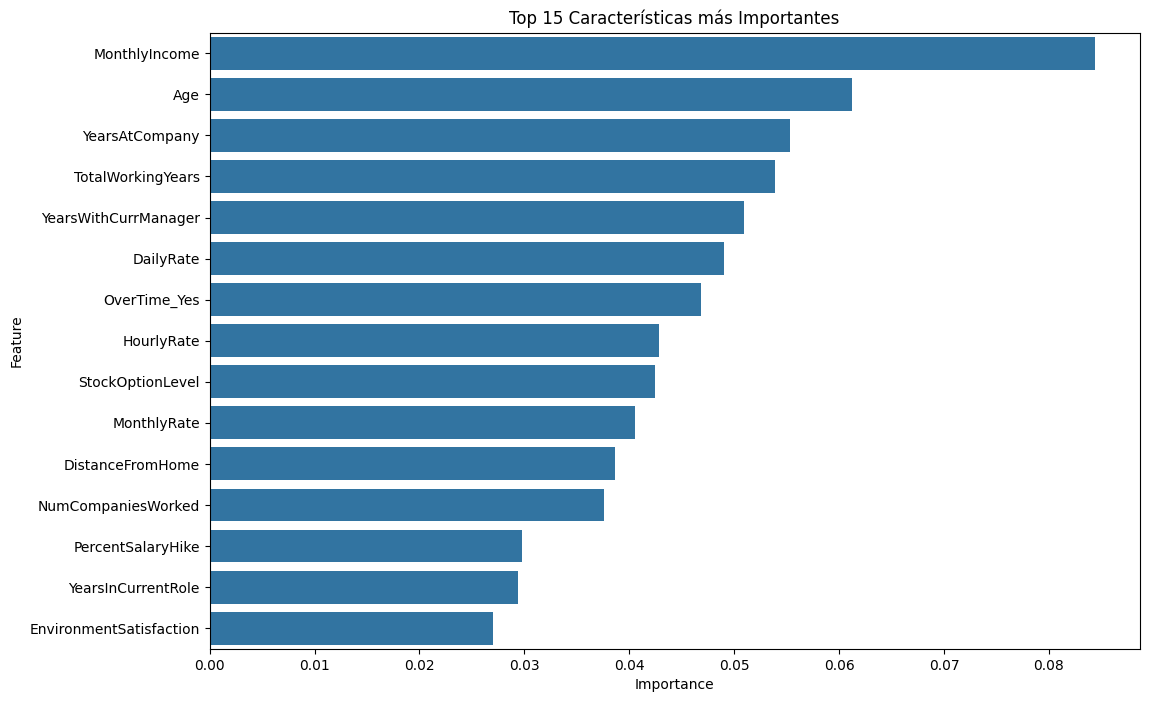

In [7]:
# Importancia de características
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Características más Importantes')
plt.show()

# SHAP values para interpretación más detallada
import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)



In [ ]:
import pandas as pd
import joblib
import json

# Cargar modelo y preprocesadores
model = joblib.load('attrition_model.pkl')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl')


def predict_attrition(employee_data):

    try:
        # Convertir a DataFrame
        input_data = pd.DataFrame([employee_data])
        
        # Preprocesamiento similar al entrenamiento
        
        # 1. Codificar variables categóricas (deben coincidir con el entrenamiento)
        categorical_cols = {
            'BusinessTravel': ['Travel_Frequently', 'Travel_Rarely'],
            'Department': ['Research & Development', 'Sales'],
            'EducationField': ['Life Sciences', 'Medical', 'Other'],
            'Gender': ['Male'],
            'JobRole': ['Laboratory Technician', 'Research Scientist', 'Sales Executive'],
            'MaritalStatus': ['Married', 'Single'],
            'OverTime': ['Yes']
        }
        
        # Crear dummies (asegurando mismas columnas que en entrenamiento)
        for col, values in categorical_cols.items():
            for val in values:
                input_data[f"{col}_{val}"] = (input_data[col] == val).astype(int)
            input_data.drop(col, axis=1, inplace=True)
        
        # 2. Eliminar columnas no usadas
        cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
        for col in cols_to_drop:
            if col in input_data.columns:
                input_data.drop(col, axis=1, inplace=True)
        
        # 3. Escalar variables numéricas
        num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                   'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
        
        input_data[num_cols] = scaler.transform(input_data[num_cols])
        
        # 4. Asegurar que tenemos todas las columnas esperadas por el modelo
        expected_columns = X_train.columns.tolist()
        for col in expected_columns:
            if col not in input_data.columns:
                input_data[col] = 0  # Añadir columnas faltantes con 0
        
        # Reordenar columnas como el modelo espera
        input_data = input_data[expected_columns]
        
        # 5. Predecir
        probability = model.predict_proba(input_data)[0, 1]
        
        return {
            "attrition_probability": float(probability),
            "attrition_risk": "Alto" if probability > 0.7 else "Moderado" if probability > 0.4 else "Bajo"
        }
        
    except Exception as e:
        return {"error": str(e)}

In [10]:
# Datos de ejemplo de un nuevo empleado
new_employee = {
    "Age": 32,
    "BusinessTravel": "Travel_Rarely",
    "DailyRate": 800,
    "Department": "Research & Development",
    "DistanceFromHome": 10,
    "Education": 3,
    "EducationField": "Life Sciences",
    "EmployeeCount": 1,
    "EmployeeNumber": 12345,
    "EnvironmentSatisfaction": 2,
    "Gender": "Male",
    "HourlyRate": 60,
    "JobInvolvement": 3,
    "JobLevel": 2,
    "JobRole": "Research Scientist",
    "JobSatisfaction": 3,
    "MaritalStatus": "Married",
    "MonthlyIncome": 5000,
    "MonthlyRate": 20000,
    "NumCompaniesWorked": 2,
    "Over18": "Y",
    "OverTime": "No",
    "PercentSalaryHike": 14,
    "PerformanceRating": 3,
    "RelationshipSatisfaction": 3,
    "StandardHours": 80,
    "StockOptionLevel": 1,
    "TotalWorkingYears": 8,
    "TrainingTimesLastYear": 2,
    "WorkLifeBalance": 3,
    "YearsAtCompany": 5,
    "YearsInCurrentRole": 3,
    "YearsSinceLastPromotion": 2,
    "YearsWithCurrManager": 3
}

# Hacer la predicción
result = predict_attrition(new_employee)
print(f"Probabilidad de Attrition: {result['attrition_probability']:.2%}")
print(f"Nivel de Riesgo: {result['attrition_risk']}")

Probabilidad de Attrition: 3.28%
Nivel de Riesgo: Bajo
